<a href="https://colab.research.google.com/github/kaeatitayauk/CE888_2020_DSS/blob/master/Lab2/lab2_boostrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
data

array([ 2.,  8., 20., 13.,  5.,  9., 10.,  8., 22., 10.,  2.,  4.,  7.,
        9.])

In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
    bootstrap = np.random.choice(sample,(n_iterations,sample_size),replace = True) # chose sample (may repeat in each select in each set)
    ListMean = []
    for i in range (len(bootstrap)):
      NewSamples = bootstrap[i,:]
      SampleMean = np.mean(NewSamples)
      ListMean.append(SampleMean)
    lower = np.percentile(ListMean, 2.5)
    upper = np.percentile(ListMean, 97.5)
    data_mean = np.mean(bootstrap)	
    return data_mean, lower, upper

(0.0, 100000.0)

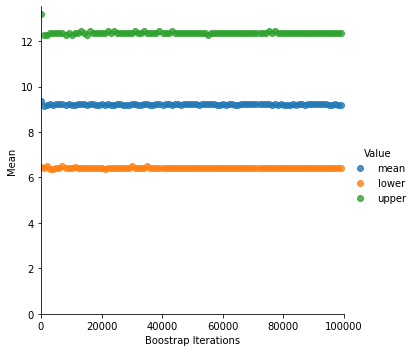

In [19]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
    bootstrap = np.random.choice(sample,(iterations,sample_size),replace = True)
    ListMean = []
    for i in range (len(bootstrap)):
      NewSamples = bootstrap[i,:]
      SampleMean = np.mean(NewSamples)
      ListMean.append(SampleMean)
    lower = np.percentile(ListMean, (100-ci)/2)
    upper = np.percentile(ListMean, ci+((100-ci)/2))
    data_mean = np.mean(bootstrap)
    return data_mean, lower, upper

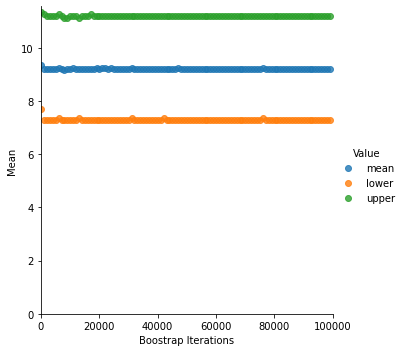

In [6]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

#**Vehicles dataset**
Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed

In [38]:
# Load and visualise the vehicles dataset
df_veh = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
# Note: you can add more cells as needed to organise your code and your plots
# dealing with the missing values
x = df_veh[~np.isnan(df_veh)]
mean = np.mean(x)
mean
new_sample = df_veh.T[1]
new_sample

Current fleet    15.0
New Fleet        27.0
Name: 1, dtype: float64

In [39]:
x

,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0
...,...,...
244,27,NaN
245,27,NaN
246,32,NaN
247,28,NaN


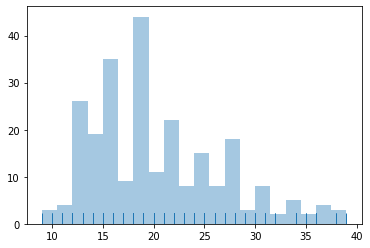

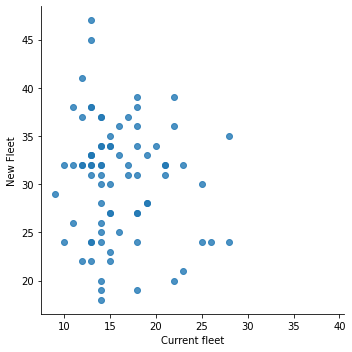

In [41]:
# Compare the two fleets.
# You can create a permutation test function to do this. Check the lecture notes!
datacol= df_veh[df_veh.columns[0]].values
sns.distplot(datacol, bins=20,kde=False, rug=True)
sns.lmplot(df_veh.columns[0],df_veh.columns[1],data=df_veh,fit_reg=False)

     Boostrap Iterations       Mean  Value
0                    100  21.000000   mean
1                    100  15.000000  lower
2                    100  27.000000  upper
3                   1100  21.174545   mean
4                   1100  15.000000  lower
..                   ...        ...    ...
295                98100  15.000000  lower
296                98100  27.000000  upper
297                99100  20.988133   mean
298                99100  15.000000  lower
299                99100  27.000000  upper

[300 rows x 3 columns]


(0.0, 100000.0)

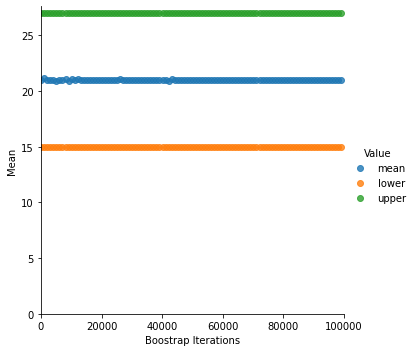

In [42]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(new_sample, new_sample.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
print(df_boot)
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)